In [1]:
#import the required libraries
import os
import csv
import requests
import json as json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import numpy as np
import matplotlib.pyplot as plt
#is this needed?
%matplotlib inline 
from matplotlib import cm
import seaborn as sns


## The following are api calls that provide some useful information

In [ ]:
#Counts the number of books from 11/1/2019. Over 1.4 million
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=count(BibNum)&reportdate=2019-11-01T00:00:00.000
#get list of neighborhoods
https://data.seattle.gov/resource/6vkj-f5xf.json?$query=select distinct ItemLocation
#See number by a neightborhood
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=count(BibNum)&ItemLocation=cen
#I think we need: col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm (Madrona Sally Goaldman for central).
#None in Laurelhusrt
#This returns counts by location:
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation

#Not sure if this works    
https://data.seattle.gov/resource/6vkj-f5xf.json?$query=select count(BibNum) where ItemLocation=col OR ItemLocation=mon
    
    

## Open json file

In [5]:
#Open up the files for reading
with open("SPL-bibCOUNTS-May2019.json", "r") as read_file: #Replace this with the filename of your choice
    jmay = json.load(read_file)
with open("SPL-bibCOUNTS-July2019.json", "r") as read_file: #Replace this with the filename of your choice
    jjuly = json.load(read_file)


## Get the number of books in branches
col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm (Madrona Sally Goaldman for central).
Use Uni for Laurelhusrt

In [7]:
#This gets the recent ones for the neighborhoods and the date
coldate1 = '"2019-05-01T00:00:00.000"'
coldate2 = '"2019-07-01T00:00:00.000"'
may=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$where=reportdate='+coldate1+'&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets
july=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$where=reportdate='+coldate2+'&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets

#THis one gets all:
#r=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets
jmay=json.loads(may.text) #parse the json into a list
jjuly=json.loads(july.text) #parse the json into a list


In [8]:
test = jmay +jjuly
print(len(test))
print(len(jmay))
print(len(jjuly))

65
33
32


In [9]:
#jmay[0]
jjuly[0]


{'ItemLocation': 'col', 'count_BibNum': '32701'}

## Save the json files

In [10]:
with open('SPL-bibCOUNTS-May2019.json', "w") as write_file:
    json.dump(jmay, write_file)
with open('SPL-bibCOUNTS-July2019.json', "w") as write_file:
    json.dump(jjuly, write_file)

## Get the count of books in your branches


In [11]:
#col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm
mayhoods = jmay #create a json file to mess with
julyhoods = jjuly

branches1=[] #dim list as a empty list

for c in mayhoods:  #d is the dictionary of parsed json
        if c['ItemLocation']=='col':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='mgm':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='qna':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='gwd':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='nga':
            branches1.append(c['count_BibNum'])
        if c['ItemLocation']=='uni':
            branches1.append(c['count_BibNum'])

            
branches2=[] #dim list as a empty list

for c in julyhoods:  #d is the dictionary of parsed json
        if c['ItemLocation']=='uni':
            branches2.append(c['count_BibNum'])
        if c['ItemLocation']=='net':
            branches2.append(c['count_BibNum'])
        if c['ItemLocation']=='mon':
            branches2.append(c['count_BibNum'])

print("List built:", len(branches1),"elements") #print how many elements are in lists
print("List built:", len(branches2),"elements")

List built: 6 elements
List built: 3 elements


In [12]:
#Convert the dictionary to a dataframe
bibctsmay = pd.DataFrame(branches1, columns=['bibcount'])
bibctsmay = pd.to_numeric(bibctsmay['bibcount'])

bibctsjuly = pd.DataFrame(branches2, columns=['bibcount'])
bibctsjuly = pd.to_numeric(bibctsjuly['bibcount'])

print(bibctsmay.head(10))
print(bibctsjuly.head(10))


0    31488
1    34276
2    30023
3    51710
4    23893
5    10226
Name: bibcount, dtype: int64
0    16425
1    30166
2    60672
Name: bibcount, dtype: int64


In [13]:
#This is needed to get the totals for the next part which is gathering the actual data
maybooks=bibctsmay.sum()
julybooks=bibctsjuly.sum()
print(maybooks)
print(julybooks)

181616
107263


# Retrieve Recent Records

### Open previous json if alread gathered, skip to create CSV

In [2]:
#Open up the file for reading (this file location is on a harddrive because it's too big to push to GitHub)
with open("C:/Users/Andre/Documents/Research/Free_little_lib/DataAnalysis/SPL/SPL-Study-Data.json", "r") as read_file: #Replace this with the filename of your choice
    alldata = json.load(read_file)
count=len(alldata)
count

288879

## Collect the data

In [14]:
#col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm
#This works in browser: https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= 'col' or ItemLocation='mon' or ItemLocation='qna' or ItemLocation='gwd' or ItemLocation='mgm' or ItemLocation='nga' or ItemLocation='uni' or ItemLocation='net' and reportdate='2019-11-01T00:00:00.000'&$limit=
#This gets the recent ones and limits the number to what was calculated above
s=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= "col" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="qna" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="gwd" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="mgm" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="nga" and reportdate="2019-05-01T00:00:00.000" or ItemLocation="uni" and reportdate="2019-05-01T00:00:00.000"&$limit='+str(maybooks)) #build string according to SOCRATA's convention to get public data assets
t=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= "mon" and reportdate="2019-07-01T00:00:00.000" or ItemLocation="uni" and reportdate="2019-07-01T00:00:00.000" or ItemLocation="net" and reportdate="2019-07-01T00:00:00.000"&$limit='+str(julybooks)) #build string according to SOCRATA's convention to get public data assets

#Check this: https://stackoverflow.com/questions/42078161/python-appending-json-object-to-exisiting-json-object

#THis one gets all:
#r=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets


l=json.loads(s.text)
m=json.loads(t.text)
alldata= l + m
print(len(alldata))


288879


## Save the json file

In [58]:
with open('SPL-Study-Data.json', "w") as write_file:
    json.dump(alldata, write_file)

NameError: name 'alldata' is not defined

# Create CSV
dataframe created is df by transforming the alldata json file

#### Skip this if CSV is already created

In [61]:

metadata=open('SPL-Study-Data.csv', 'w', newline='', encoding='utf-8')
csv.writer(metadata).writerow(['bibnum','title','author','isbn','reportdate','publicationyear','itemtype','itemcollection','itemlocation'])

for i in alldata:
    csv.writer(metadata).writerow([i['bibnum'],
        i.get('title'),
        i.get('author'),
        i.get('isbn'),
        i.get('reportdate'),
        i.get('publicationyear'),
        i.get('itemtype'),
        i['itemcollection'],
        i['itemlocation']])                                  
        #i.get('isbn'), #For any of these .get(), adding ",'N/A'" will fill the null cells with 'N/A'.
                                   

metadata.close() #Close the output file, release all locks

#Open up the same file as a dataframe. Encode cp1252 avoids a utf-8 error.  But here cp1252 produces an error!
df = pd.read_csv('SPL-Study-Data.csv',encoding='utf-8')

print('The resulting dataframe has',len(df),'rows')

The resulting dataframe has 288879 rows


In [62]:
df.head(1)

,bibnum,title,author,isbn,reportdate,publicationyear,itemtype,itemcollection,itemlocation
0,3131733,Bats / Tedd Arnold.,"Arnold, Tedd","0545778131, 1480679704, 9780545778138, 9781480...",2019-05-01T00:00:00.000,[2015],jcbk,ncenf,uni


## Open data dictionary file to map fiction/nonfiction and media type

In [4]:
#Open previously created csv file if needed:
#This is raw data
df = pd.read_csv('C:/Users/Andre/Documents/Research/Free_little_lib/DataAnalysis/SPL/SPL-Study-Data.csv',encoding='utf-8')

In [5]:
#Get the datadictionary
dftype = pd.read_csv('SPL-datadict-type.csv',encoding='utf-8')
dftype.head(2)

,itemtype,format
0,acart,Art
1,acphoto,Art


In [6]:
#Create a new dataframe with the data dictionary info type. Inner join is intersection so removes rows with no partner in other dataframe
dfall = pd.merge(df, dftype, on='itemtype', how='inner')

In [7]:
dfcol = pd.read_csv('SPL-datadict-collection.csv',encoding='utf-8')
dfcol.head(2)

,itemcollection,type
0,ncenf,Nonfiction
1,cabob,NaN


In [8]:
#Create a new dataframe with the data dictionary info collection. Inner join is intersection so removes rows with no partner in other dataframe
dfall = pd.merge(dfall, dfcol, on='itemcollection', how='inner')

In [9]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288879 entries, 0 to 288878
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   bibnum           288879 non-null  int64 
 1   title            288876 non-null  object
 2   author           246647 non-null  object
 3   isbn             253195 non-null  object
 4   reportdate       288879 non-null  object
 5   publicationyear  288621 non-null  object
 6   itemtype         288879 non-null  object
 7   itemcollection   288879 non-null  object
 8   itemlocation     288879 non-null  object
 9   format           288855 non-null  object
 10  type             287944 non-null  object
dtypes: int64(1), object(10)
memory usage: 26.4+ MB


## Pare down to books

In [10]:
dfbook = dfall.loc[dfall['format']=='Book']


In [11]:
dfbook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235642 entries, 0 to 288844
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   bibnum           235642 non-null  int64 
 1   title            235642 non-null  object
 2   author           225599 non-null  object
 3   isbn             234842 non-null  object
 4   reportdate       235642 non-null  object
 5   publicationyear  235443 non-null  object
 6   itemtype         235642 non-null  object
 7   itemcollection   235642 non-null  object
 8   itemlocation     235642 non-null  object
 9   format           235642 non-null  object
 10  type             235255 non-null  object
dtypes: int64(1), object(10)
memory usage: 21.6+ MB


## Add neighborhood column

In [12]:
dfhood = pd.read_csv('neighborhoods.csv',encoding='utf-8')
dfhood.head(2)

,itemlocation,reportdate,neighborhood,count
0,col,2019-05-01T00:00:00.000,Columbia City,1
1,mon,2019-07-01T00:00:00.000,Montlake,1


In [13]:
#Create a new dataframe with the neighborhood info. Inner join is intersection so removes rows with no partner in other dataframe
#Laurelhurst needs data from uni in may, Ravenna from uni in July, that's why reportdate is needed
dfbook = pd.merge(dfbook, dfhood, on=['itemlocation', 'reportdate'], how='inner')

In [14]:
dfbook.itemtype.unique()

array(['jcbk', 'acbk', 'arbk', 'jrbk', 'bcbk', 'pkbknh'], dtype=object)

## Clean book data

## Deal with the book year data issues

In [15]:
#Get a csv of the unique year values to look at problem values
dfyears = dfbook.publicationyear.unique()
dfyears = pd.DataFrame(dfyears)
dfyears.to_csv('SPLyears.csv', mode = 'w', index=False)

In [16]:
#Make sure all values are string (?) then get rid of all '[c', 'Â©' and then the rest of the brackets 
dfbook['publicationyear']= dfbook['publicationyear'].astype(str)
dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('[c',''),'')
#dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('Â©',''),'')
dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('[','').replace(']','')) 
#dfbook['publicationyear'] = preg_replace("/(©|&copy;|&#169;)/", "", dfbook['publicationyear'])
#dfbook['publicationyear'] = str_replace(array('©'), array(''), dfbook['publicationyear'])

In [17]:
#Create csv file to look at what date problems are left
#The cleaning seems to do a very good job.  Any blanks appear to be blank at SPL too.
dfbook.to_csv('SPL-book-data-cleaned.csv', mode = 'w', index=False)

In [18]:
#The year values are very difficult- lots of non numeric characters.
#Use: https://realpython.com/python-data-cleaning-numpy-pandas/#combining-str-methods-with-numpy-to-clean-columns

#reg expression: r'^(\d{4})'  This takes the first four numeric digits.  Everything else goes to NaN
extr = dfbook['publicationyear'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    2015
1    2016
2    2014
3    2017
4    2015
Name: publicationyear, dtype: object

In [19]:
#Convert to numeric and show datatype
dfbook['publicationyear'] = pd.to_numeric(extr)
dfbook['publicationyear'].dtype

dtype('float64')

In [20]:
#What percent are Nan?
dfbook['publicationyear'].isnull().sum() / len(dfbook)

0.019092521706656707

In [21]:
len(dfbook)

235642

In [12]:
dfbook.head(1)

,bibnum,title,author,isbn,reportdate,publicationyear,itemtype,itemcollection,itemlocation,format,type,neighborhood,count
0,3131733,Bats / Tedd Arnold.,"Arnold, Tedd","0545778131, 1480679704, 9780545778138, 9781480...",2019-05-01T00:00:00.000,2015.0,jcbk,ncenf,uni,Book,Nonfiction,Laurelhurst,1


In [22]:
#The title and author are stored in the same variable separated by " / ".  Need to split those out.  There is an
#author variable as well but the values are stored in many different formats
#Rename title variable
dfbook.rename({'title': 'titleAuthor'}, axis=1, inplace=True)
#Split out title
dfbook['title'] = dfbook.titleAuthor.str.replace("( / ).*","")
#dfbook.head(1)

In [19]:
#Save csv file.  THIS IS THE WORKING DATAFILE FOR THE REST OF THIS NOTEBOOK
dfbook.to_csv('SPL-dfbook.csv', mode = 'w', index=False)

## ANALSYS
Should have a dfbook dataframe at this point

In [2]:
#Open a previous CSV
dfbook = pd.read_csv('SPL-dfbook.csv',encoding='utf-8')

### Histogram of years

In [24]:
#Open LFL year data
lflyear = pd.read_csv('LFL-books-years.csv',encoding='utf-8')
lflyear.head()

,yrpub,count,authorOfColor,nonPersonAuthor,neighborhood,collection,type,age,category1,category2,languages,originalLang
0,2004,1,0,1,Montlake,Montlake5,Nonfiction,Adult,Self Help/Health,Null,English,English
1,1984,1,0,1,Northgate,Northgate3,Nonfiction,Adult,Crafts,Null,English,English
2,2012,1,0,0,Northgate,Northgate3,Fiction,Childrens,Null,Null,English,English
3,1967,1,0,0,Phinney-Greenwood,Phinney-Green2,Nonfiction,Adult,Self Help/Health,Null,English,NaN
4,1984,1,0,0,Phinney-Greenwood,Phinney-Green3,Nonfiction,Adult,History,Null,English,English


In [25]:
lflyear['count'].sum()

1014

In [26]:
#Earliest year
dftemp = dfbook.sort_values(by='publicationyear', ascending=True).reset_index()
dftemp.head(1)

,index,bibnum,titleAuthor,author,isbn,reportdate,publicationyear,itemtype,itemcollection,itemlocation,format,type,neighborhood,count,title
0,119670,2584898,Statistical abstract of the United States / pr...,NaN,NaN,2019-05-01T00:00:00.000,1879.0,arbk,naref,mgm,Book,Reference,Central District,1,Statistical abstract of the United States


In [32]:
#Set up a dataset with years going back as far as LFLs- Want to compare apples to apples
dfbookyr = dfbook.loc[dfbook['publicationyear']>1927]
print("Original:",len(dfbook)," New dataset:",len(dfbookyr))
dfbookyr.head()

Original: 235642  New dataset: 231130


,bibnum,titleAuthor,author,isbn,reportdate,publicationyear,itemtype,itemcollection,itemlocation,format,type,neighborhood,count,title
0,3131733,Bats / Tedd Arnold.,"Arnold, Tedd","0545778131, 1480679704, 9780545778138, 9781480...",2019-05-01T00:00:00.000,2015.0,jcbk,ncenf,uni,Book,Nonfiction,Laurelhurst,1,Bats
1,3162791,Fresh delicious : poems from the farmer's mark...,"Latham, Irene","1629791032, 9781629791036",2019-05-01T00:00:00.000,2016.0,jcbk,ncenf,uni,Book,Nonfiction,Laurelhurst,1,Fresh delicious : poems from the farmer's market
2,3093916,The scoop on ice cream / by Bonnie Williams ; ...,"Williams, Bonnie","1480663417, 1481409816, 1481409824, 9781480663...",2019-05-01T00:00:00.000,2014.0,jcbk,ncenf,uni,Book,Nonfiction,Laurelhurst,1,The scoop on ice cream
3,3278822,Race cars / designed and illustrated by David ...,"West, David, 1956-","1625884036, 9781625884039",2019-05-01T00:00:00.000,2017.0,jcbk,ncenf,uni,Book,Nonfiction,Laurelhurst,1,Race cars
4,3025274,"Lion, tiger, and bear / by Kate Ritchey ; with...","Ritchey, Kate","044848336X, 0448483378, 9780448483368, 9780448...",2019-05-01T00:00:00.000,2015.0,jcbk,ncenf,uni,Book,Nonfiction,Laurelhurst,1,"Lion, tiger, and bear"


(1900.0, 2020.0)

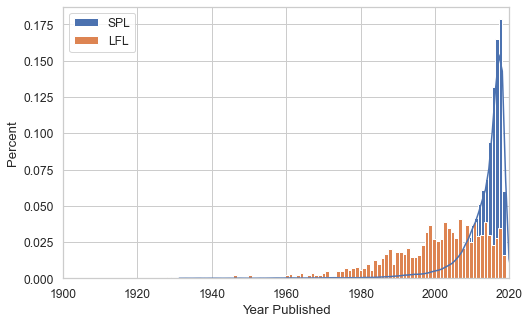

In [33]:
#'Density' Histogram of year published using mtlabplot (change kde to false for counts, or to get rid of gaussian line, change norm_hist to True)
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

#SPL
p1= sns.distplot(
    dfbookyr['publicationyear'], norm_hist=False, kde=True, bins=92, hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Percent')
#LFL
p1= sns.distplot(
    lflyear['yrpub'], norm_hist=True, kde=False, bins=92, hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Percent')

plt.legend(labels=['SPL','LFL'])
plt.xlim(1900, 2020)

(1960.0, 2020.0)

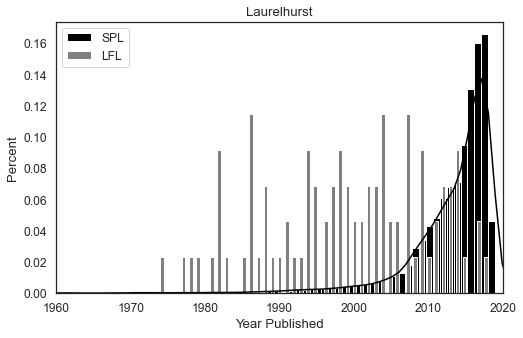

In [39]:
# BY NEIGHBORHOOD
#'Density' Histogram of year published using mtlabplot (change kde to false for counts, or to get rid of gaussian line, change norm_hist to True)
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

hood = "Laurelhurst"

#dfbookyrcol = dfbookyr[dfbookyr['itemlocation']=='col']
dfbookyrcol = dfbookyr[dfbookyr['neighborhood']==hood]
lflyearcol = lflyear[lflyear['neighborhood']==hood]


#SPL
p1= sns.distplot(
    dfbookyrcol['publicationyear'], norm_hist=False, kde=True, bins=92, color='black', hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Percent')
#LFL
p1= sns.distplot(
    lflyearcol['yrpub'], norm_hist=True, kde=False, bins=92, color = 'gray', hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Percent')

plt.legend(labels=['SPL','LFL'])
plt.title(hood)
plt.xlim(1960, 2020)

In [35]:
dfbookyr.neighborhood.unique()

array(['Laurelhurst', 'Columbia City', 'Phinney-Greenwood', 'Queen Anne',
       'Central District', 'Northgate', 'Ravenna', 'Montlake'],
      dtype=object)

In [36]:
hoods = pd.DataFrame(dict(neighborhood=dfbookyr.neighborhood.unique()))
hoods = hoods.sort_values(by=['neighborhood'])
hoods.head()


,neighborhood
4,Central District
1,Columbia City
0,Laurelhurst
7,Montlake
5,Northgate


In [87]:

for h in hoods['neighborhood']:
    hood=h
    print(hood)


Central District
Columbia City
Laurelhurst
Montlake
Northgate
Phinney-Greenwood
Queen Anne
Ravenna


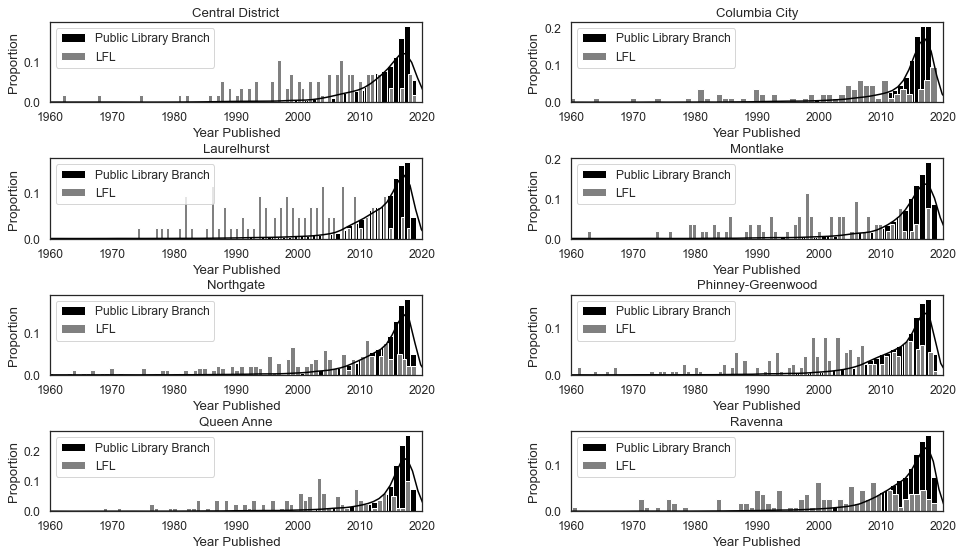

In [40]:
# BY NEIGHBORHOOD
#'Density' Histogram of year published using mtlabplot (change kde to false for counts, or to get rid of gaussian line, change norm_hist to True)
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='white', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

plt.rcParams["figure.figsize"] = [16,9]

# create a color palette
palette = plt.get_cmap('tab20b')

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.4)

num=0
for h in hoods['neighborhood']:
    hood = h    
    dfbookyrcol = dfbookyr[dfbookyr['neighborhood']==hood]
    lflyearcol = lflyear[lflyear['neighborhood']==hood]
    
    num+=1
    plt.subplot(4,2, num)
    
    #SPL
    p1= sns.distplot(
        dfbookyrcol['publicationyear'], norm_hist=False, kde=True, bins=92, color="black", hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Proportion')
    #LFL
    p1= sns.distplot(
        lflyearcol['yrpub'], norm_hist=True, kde=False, bins=92, color="gray", hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Proportion')

    plt.legend(labels=['Public Library Branch','LFL'])
    plt.title(hood)
    plt.xlim(1960, 2020)


## Compare Titles

In [ ]:
#Open SPL book data if you don't have it yet
dfbook = pd.read_csv('SPL-dfbook.csv',encoding='utf-8')

In [3]:
#Open LFL data
dflflbook = pd.read_csv('bookData.csv',encoding='utf-8')

In [9]:
# Merge tables to find LFL books that exist in library.  Left table is LFL, right is SPL, use Left join to show books
# in LFLs that are present in library branch.
test=pd.merge(dflflbook, dfbook, on=['neighborhood', 'title'], how='left')

In [11]:
test.info()
#Looking at the column titleAuthor shows how many LFL books have matches. This misses a lot of matches!!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 0 to 1016
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cataloger         1017 non-null   object 
 1   bookid            1017 non-null   object 
 2   count_x           1017 non-null   int64  
 3   title             1017 non-null   object 
 4   author_x          1001 non-null   object 
 5   combinedName      983 non-null    object 
 6   authorOfColor     1017 non-null   int64  
 7   nonPersonAuthor   1017 non-null   int64  
 8   yrpub             1017 non-null   object 
 9   neighborhood      1017 non-null   object 
 10  collection        1017 non-null   object 
 11  age               1017 non-null   object 
 12  type_x            1017 non-null   object 
 13  category1         1017 non-null   object 
 14  category2         1017 non-null   object 
 15  publication       993 non-null    object 
 16  media             993 non-null    object 


In [13]:
matches = test[test.titleAuthor.notnull()]

In [15]:
matches.head(16)

,cataloger,bookid,count_x,title,author_x,combinedName,authorOfColor,nonPersonAuthor,yrpub,neighborhood,...,author_y,isbn_y,reportdate,publicationyear,itemtype,itemcollection,itemlocation,format,type_y,count_y
137,H,168224337,1,Homegoing,"Gyasi, Yaa",Yaa Gyasi,1,0,2017,Columbia City,...,"Gyasi, Yaa","1101947136, 9781101947135, 9781101971062",2019-05-01T00:00:00.000,2016.0,acbk,nafic,col,Book,Fiction,1.0
220,A,168434422,1,Anne of Green Gables,"Montgomery, L. M.",L. M. Montgomery,0,0,2014,Laurelhurst,...,"Montgomery, L. M. (Lucy Maud), 1874-1942","1402714513, 9781402714511",2019-05-01T00:00:00.000,2004.0,jcbk,ncfic,uni,Book,Fiction,1.0
647,H,170372424,1,"Winesburg, Ohio","Anderson, Sherwood",Sherwood Anderson,0,0,1976,Ravenna,...,"Anderson, Sherwood, 1876-1941","0140186557, 9780140186550",2019-07-01T00:00:00.000,1992.0,acbk,nafic,net,Book,Fiction,1.0
648,H,170372424,1,"Winesburg, Ohio","Anderson, Sherwood",Sherwood Anderson,0,0,1976,Ravenna,...,"Anderson, Sherwood, 1876-1941","0140186557, 9780140186550",2019-07-01T00:00:00.000,1992.0,acbk,nafic,uni,Book,Fiction,1.0
666,H,170372862,1,Unmasked,"Henley, Virginia",Virginia Henley,0,0,2005,Ravenna,...,"Lloyd Webber, Andrew, 1948-","0062424203, 9780062424204",2019-07-01T00:00:00.000,NaN,acbk,nanf,uni,Book,Nonfiction,1.0
677,H,170372979,1,Blaze,"Ross, JoAnn",JoAnn Ross,0,0,2005,Ravenna,...,"King, Stephen, 1947-","1416555048, 9781416555049",2019-07-01T00:00:00.000,2008.0,acbk,nafic,net,Book,Fiction,1.0
748,H,168224347,1,Runaway Ralph,"Cleary, Beverly",Beverly Cleary,0,0,1981,Columbia City,...,"Cleary, Beverly","068821701X, 9780688217013",2019-05-01T00:00:00.000,2006.0,jcbk,ncfic,col,Book,Fiction,1.0
826,H,168002667,1,"Hello, Mrs. Piggle-Wiggle","MacDonald, Betty",Betty MacDonald,0,0,2007,Northgate,...,"MacDonald, Betty Bard","0064401499, 0397317158, 9780064401494, 9780397...",2019-05-01T00:00:00.000,2007.0,jcbk,ncfic,nga,Book,Fiction,1.0
912,A,168459306,1,Abuela,0,NaN,0,0,?,Phinney-Greenwood,...,"Dorros, Arthur",0525447504,2019-05-01T00:00:00.000,1991.0,jcbk,ncpic,gwd,Book,Fiction,1.0
914,A,168459342,1,George shrinks,"Joyce, William",William Joyce,0,0,1985,Phinney-Greenwood,...,"Joyce, William, 1957-","1481489534, 9781481489539",2019-05-01T00:00:00.000,2017.0,jcbk,ncpic,gwd,Book,Fiction,1.0


### Calculate Cumulative Percentage

#### SPL

In [117]:
#Groups by pub year 
dfSPLyr = dfbook.groupby(['publicationyear'])['count'].sum().reset_index() #total of each category
#Sort high to low
dfSPLyr = dfSPLyr.sort_values(by='publicationyear', ascending=False).reset_index()

In [118]:
dfSPLyr['cumulative']=dfSPLyr['count'].cumsum()/dfSPLyr['count'].sum()
dfSPLyr.head(20)

,index,publicationyear,count,cumulative
0,85,2019.0,13071,0.056549
1,84,2018.0,38563,0.223386
2,83,2017.0,35682,0.377757
3,82,2016.0,28480,0.500971
4,81,2015.0,20262,0.588631
5,80,2014.0,14849,0.652873
6,79,2013.0,13106,0.709574
7,78,2012.0,11083,0.757522
8,77,2011.0,9007,0.796490
9,76,2010.0,7961,0.830932


#### LFL

In [110]:
#Create new dataframe
dfLFLyr=lflyear

In [111]:
#Groups by pub year 
dfLFLyr = dfLFLyr.groupby(['yrpub'])['count'].sum().reset_index() #total of each category
#Sort high to low
dfLFLyr = dfLFLyr.sort_values(by='yrpub', ascending=False).reset_index()

In [112]:
total = dfLFLyr['count'].sum()
print(total)

1014


In [113]:
dfLFLyr['cumulative']=dfLFLyr['count'].cumsum()/dfLFLyr['count'].sum()
dfLFLyr.head(40)

,index,yrpub,count,cumulative
0,67,2019,16,0.015779
1,66,2018,35,0.050296
2,65,2017,28,0.077909
3,64,2016,23,0.100592
4,63,2015,30,0.130178
5,62,2014,39,0.168639
6,61,2013,30,0.198225
7,60,2012,29,0.226824
8,59,2011,39,0.265286
9,58,2010,25,0.289941


# Set up a dataframe with SPL data by neighborhood
fiction/nonfiction, percent children

In [44]:
dfbook.type.unique()

array(['Nonfiction', 'Fiction', 'Language', 'Reference', nan],
      dtype=object)

### Percent Fiction

In [45]:
#Set up a dataframe with the percent fiction

#Groups count by Neighborhood, and type, calculates percent
bksfiction = dfbook.groupby(['neighborhood', 'type'])['count'].sum().reset_index() #total of each category
bksfiction['total'] = bksfiction.groupby('neighborhood')['count'].transform('sum') #Inserts total count for the neighborhood for each type in each neighborhood 
bksfiction['percent'] = bksfiction['count']/bksfiction['total']


#Select fiction
fic = bksfiction.loc[bksfiction['type']=='Fiction']
fic.head(8)

,neighborhood,type,count,total,percent
0,Central District,Fiction,5485,7809,0.702395
3,Columbia City,Fiction,14870,26486,0.561429
7,Laurelhurst,Fiction,12965,23965,0.540997
11,Montlake,Fiction,7731,13001,0.594647
14,Northgate,Fiction,16174,27569,0.586673
18,Phinney-Greenwood,Fiction,22772,42934,0.530395
22,Queen Anne,Fiction,10197,18491,0.551457
26,Ravenna,Fiction,42233,75000,0.563107


In [46]:
fictionbks = fic['count'].sum()
totalbks = fic['total'].sum()
perfic = fictionbks/totalbks
print(perfic)

0.5629083335104461


In [47]:
test = dfbook.copy()
test['age'] = dfbook['itemtype'].str[:1]


In [48]:
#Save csv file for further testing: 
fic.to_csv('SPL-fiction.csv', mode = 'w', index=False)

### Percent Juvenile

In [49]:
dfbook.itemtype.unique()


array(['jcbk', 'acbk', 'arbk', 'jrbk', 'bcbk', 'pkbknh'], dtype=object)

In [50]:
#Set up a dataframe with the juvenile books. Uses the dfbook dataframe saved before analysis

#Groups count by Neighborhood, and itemtype, calculates percent
bksage = dfbook.groupby(['neighborhood', 'itemtype'])['count'].sum().reset_index() #total of each category
bksage['ageletter'] = bksage['itemtype'].str[:1] #selects first letter of itemtype code (a=adult and YA, j=juvenile)
bksagelist = bksage.groupby(['neighborhood','ageletter'])['count'].apply(lambda x : x.astype(int).sum()) #sums up the a's and j's by neighborhood
bksage = pd.DataFrame(bksagelist).reset_index()
bksage['total'] = bksage.groupby('neighborhood')['count'].transform('sum') #Inserts total count for the neighborhood for each type in each neighborhood

bksage['percent'] = bksage['count']/bksage['total']

bksage.head()


,neighborhood,ageletter,count,total,percent
0,Central District,a,3042,7809,0.389551
1,Central District,j,4706,7809,0.602638
2,Central District,p,61,7809,0.007811
3,Columbia City,a,14818,26486,0.559465
4,Columbia City,b,8,26486,0.000302


In [51]:
#Select juveniles
bksjuv = bksage.loc[bksage['ageletter']=='j']
bksjuv.head(8)


,neighborhood,ageletter,count,total,percent
1,Central District,j,4706,7809,0.602638
5,Columbia City,j,11587,26486,0.437476
9,Laurelhurst,j,8380,23965,0.349677
13,Montlake,j,6266,13006,0.481778
17,Northgate,j,11591,27569,0.420436
21,Phinney-Greenwood,j,18297,42934,0.426166
25,Queen Anne,j,7791,18491,0.421340
29,Ravenna,j,31327,75382,0.415577


In [52]:
#Save csv file for further testing: 
bksjuv.to_csv('SPL-juvenilePercent.csv', mode = 'w', index=False)

## Compare ISBNs

In [3]:
#Open LFL raw book data and open SPL data if needed
dflfl = pd.read_csv('bookData.csv')
dfbook = pd.read_csv('SPL-dfbook.csv',encoding='utf-8')

In [103]:
#Pare down to neighborhood and isbn columns
lfl = dflfl[['neighborhood','isbn','yrpub']].copy()
spl = dfbook[['neighborhood','isbn']].copy()

In [104]:
#Convert isbn variable to string
spl['isbn'] = spl['isbn'].astype('str')

In [17]:
#The SPL data has many isbns all in the same column.  Parse them out.
#I got this from https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe
#First get needed packages 
import numpy as np
from itertools import chain

In [105]:
# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = spl['isbn'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
splisbn = pd.DataFrame({'neighborhood': np.repeat(spl['neighborhood'], lens),
                    'isbn': chainer(spl['isbn'])})

In [106]:
#The isbn column has apostrophes and an occasional 'b'. Remove them
splisbn['isbn'] = splisbn['isbn'].str.replace(r"[b\',]", '')

In [107]:
#Reset the index
splisbn.reset_index(drop=True,inplace=True)

In [108]:
#Merge dataframes to get isbns present in lfl and spl. The new dataframe has a column renamed to splhood that shows a 
#value if the isbn is present at that library branch
shared = pd.merge(lfl, splisbn, on='isbn', how='left')
shared.rename(columns={"neighborhood_x": "neighborhood", "neighborhood_y": "splhood"}, inplace=True)
#shared.to_csv('isbn-matching.csv', mode = 'w', index=False)

In [109]:
sharedbooks = shared.groupby(['isbn'])['splhood'].count().reset_index()

In [110]:
#Cound the branches for each isbn. One book is in all branches and Ravenna is two branches so 9.
sharedbooks.sort_values(by='splhood', ascending=False, inplace=True)
sharedbooks.head()

,isbn,splhood
262,198480183X,9
153,1501187597,7
41,067989067X,7
127,144248845X,5
233,1641290110,4


In [111]:
#Count isbns that are present in SPL branches
sharedbooks[sharedbooks['splhood']>0].count()

isbn       30
splhood    30
dtype: int64

In [112]:
#See the number of books from LFLs that are available in the study SPL branches
#Since this leaves out all the other branches, it's not really useful. Should just look at direct association
sharedhood= shared[shared['splhood'].notna()].groupby(['splhood']).count().reset_index()
sharedhood.head(8)

,splhood,neighborhood,isbn,yrpub
0,Central District,3,3,3
1,Columbia City,5,5,5
2,Laurelhurst,6,6,6
3,Montlake,6,6,6
4,Northgate,8,8,8
5,Phinney-Greenwood,14,14,14
6,Queen Anne,8,8,8
7,Ravenna,24,24,24


In [113]:
#Count times the LFL books are in the nearby branch
sharednotna = shared[shared['splhood'].notna()]
samehood= sharednotna[sharednotna['splhood']==sharednotna['neighborhood']].groupby(['splhood']).count().reset_index()
samehood.head(8)

,splhood,neighborhood,isbn,yrpub
0,Northgate,2,2,2
1,Phinney-Greenwood,2,2,2
2,Queen Anne,1,1,1
3,Ravenna,5,5,5


In [115]:
#Seen what year the shared books were published
years = sharednotna[sharednotna['splhood']==sharednotna['neighborhood']]
years.head(10)

,neighborhood,isbn,yrpub,splhood
444,Northgate,1487001835,2018,Northgate
543,Phinney-Greenwood,198480183X,2018,Phinney-Greenwood
754,Ravenna,1250060761,2017,Ravenna
802,Ravenna,067989067X,2000,Ravenna
805,Ravenna,1338068474,2018,Ravenna
923,Northgate,1472906500,2014,Northgate
951,Phinney-Greenwood,1641290110,2018,Phinney-Greenwood
1000,Queen Anne,144248845X,2014,Queen Anne
1008,Ravenna,1603093680,2015,Ravenna
1050,Ravenna,1606840355,2010,Ravenna
